In [117]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [118]:
oliv=datasets.fetch_olivetti_faces()

In [119]:
oliv.data.shape

(400, 4096)

In [120]:
oliv.images.shape

(400, 64, 64)

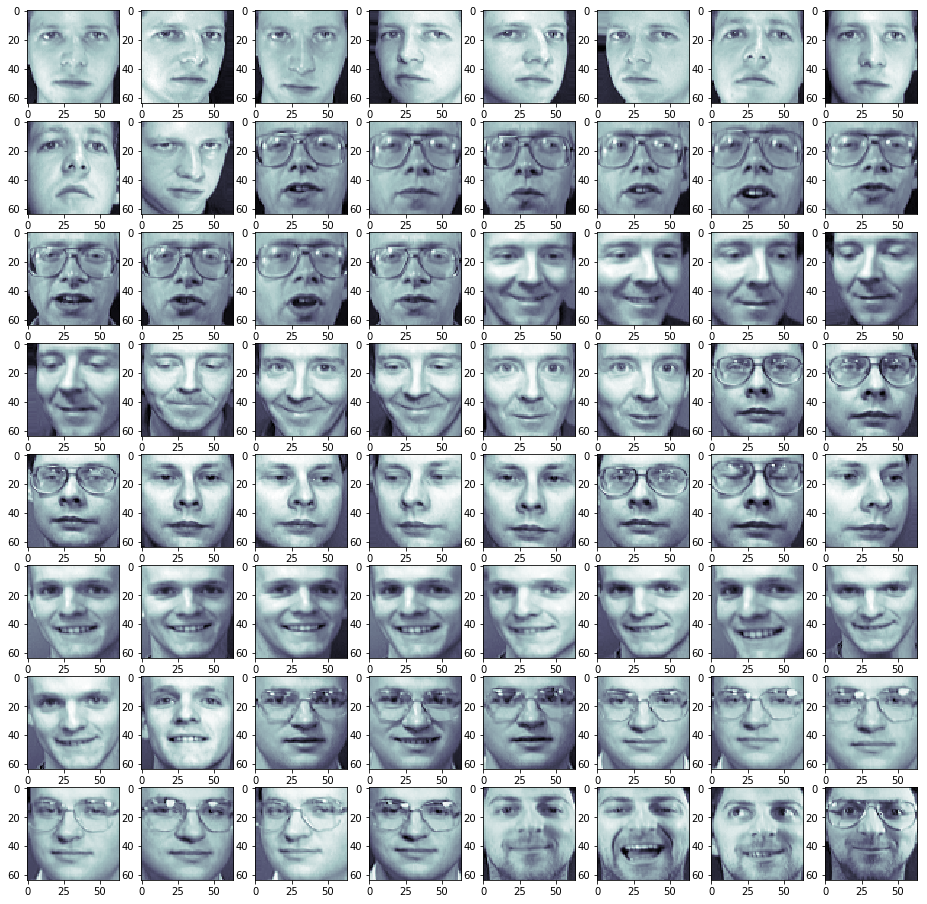

In [121]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [122]:
x=oliv.data
y=oliv.target

In [123]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [124]:
pca.components_

array([[-0.00419108, -0.0071095 , -0.0093361 , ...,  0.0001852 ,
         0.00337969,  0.00318829],
       [-0.0285913 , -0.03328845, -0.03784651, ...,  0.0296278 ,
         0.02721298,  0.02488896],
       [ 0.001357  , -0.00032572, -0.00019798, ..., -0.01541373,
        -0.01370984, -0.01188347],
       ...,
       [ 0.00223493,  0.02056659,  0.01515914, ..., -0.01273556,
        -0.05848991, -0.07650287],
       [ 0.01714708,  0.02917742, -0.00942486, ...,  0.00159098,
         0.01249339, -0.0081527 ],
       [-0.00326934,  0.01032978,  0.01475757, ..., -0.01187175,
        -0.01629114, -0.00553756]], dtype=float32)

In [125]:
pca.components_.shape

(400, 4096)

In [126]:
k=0
current_sum=0
total_sum=sum(pca.explained_variance_)
while current_sum/total_sum<0.95:
    current_sum+=pca.explained_variance_[k]
    k+=1
k

123

In [127]:
pca=PCA(n_components=k)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [128]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [129]:
x_approx_reshaped=x_approx.reshape((400, 64, 64))
x_approx.shape

(400, 4096)

In [130]:
x_approx_reshaped.shape

(400, 64, 64)

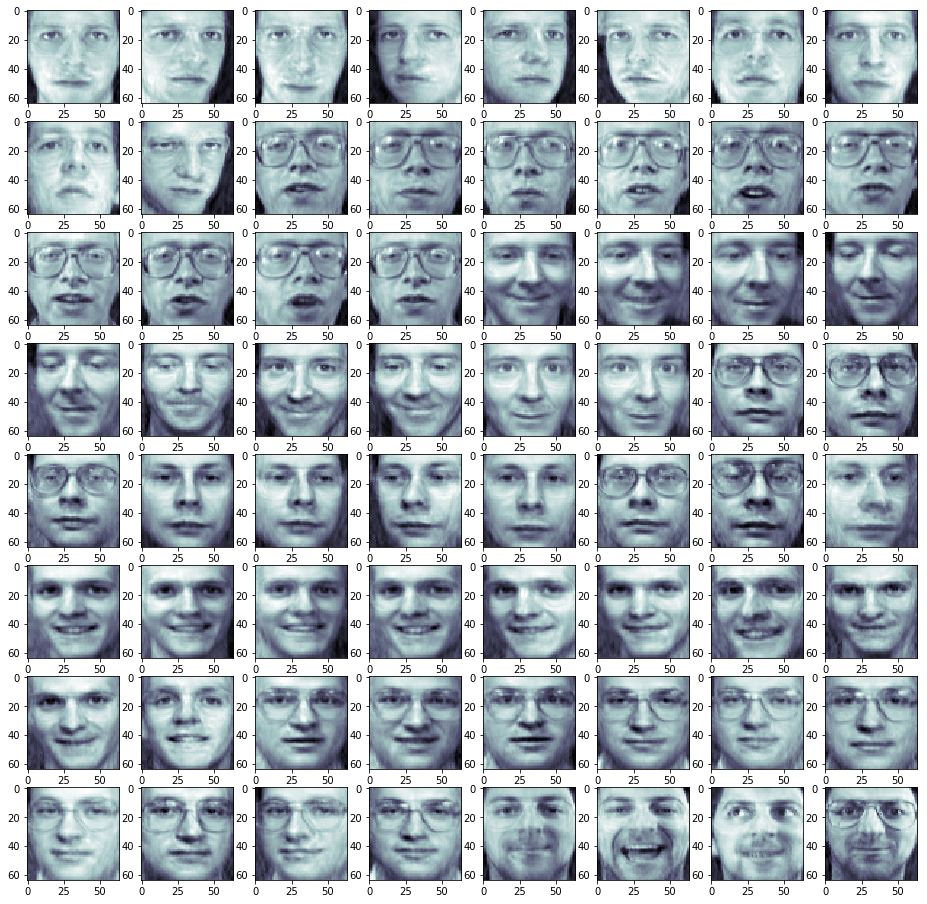

In [131]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_reshaped[i], cmap=plt.cm.bone)
plt.show()

In [132]:
eigen_v=pca.components_
eigen_v.shape

(123, 4096)

In [133]:
eigen_faces=eigen_v.reshape(123, 64, 64)

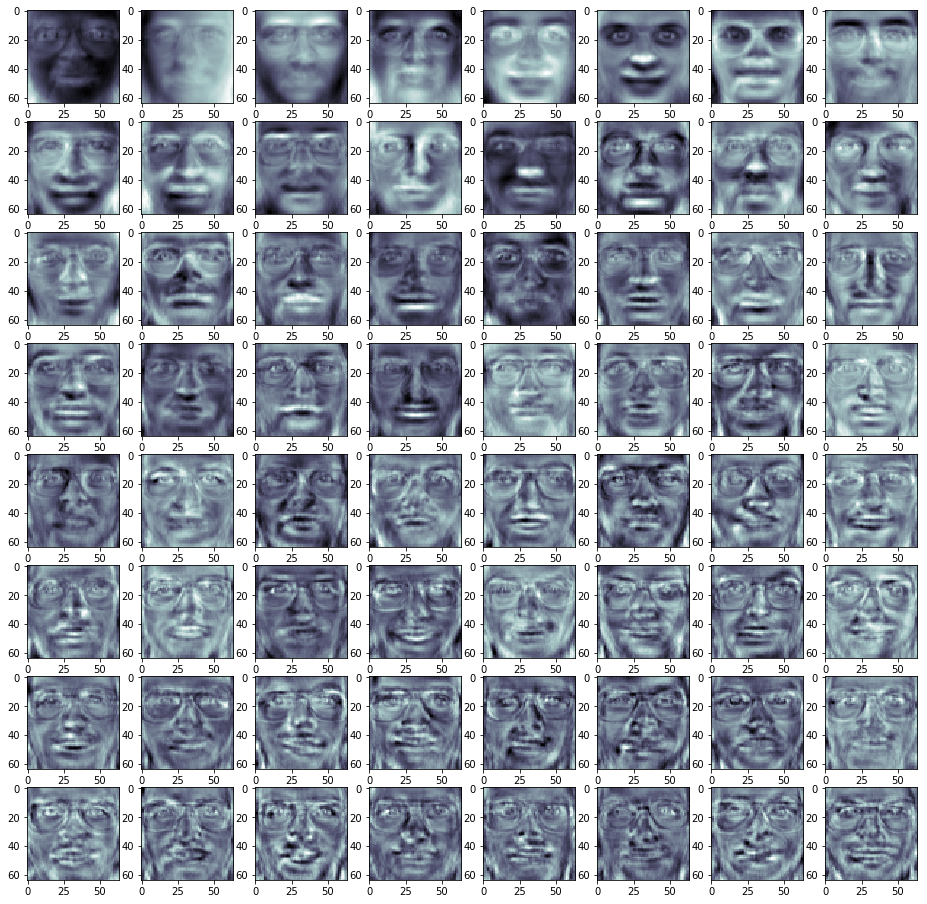

In [135]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap=plt.cm.bone)
plt.show()